# k-nearest neighbors

# Q1. k-nearest neightbors を用いたクラス分類について調べ、<br>そのアルゴリズムについて説明せよ。

# A1. 

## k-nearest neightborsとは

- n次元空間に存在するデータを使い新しいデータにラベル名をつける教師あり学習である。  
- n次元空間に存在するデータはラベル(データ名)と位置情報を元に領域が分かれている。  
- n次元空間に新しくラベルを持たないデータを入れた時、  
  新しいデータから最も近いk個のデータを見つけ、多数決により新しいデータのラベル名を決める。  
  
以上が、  
k-nearest neightborsを用いたクラス分類である。  

引用：https://ja.wikipedia.org/wiki/K%E8%BF%91%E5%82%8D%E6%B3%95

<img src="images/k-nn.png">


# k-nearest neightborsのアルゴリズムについて

k-nearest neightborsを解く為に必要な手順は以下。    
**1. 新しく入るデータと既存データとの距離の測り方**  
**2. 新しいデータが所属するグループを決める方法**  
**3. k個のデータ数を決める方法**  

1,2,3を解決することでk-nearest neightborsの問題を解くことができる。

## 1. 新しく入るデータと既存データとの距離の測り方

距離の測り方の一つにユーグリット距離がある。  
**ユーグリット距離とは**次元空間において二点間を最短距離で線形に測る方法。  
以下の図にある様に**二次元**の場合の距離の測り方は  
<img src="images/euclidean_1.png">

n次元になると以下の様にして求めることができる。
<img src="images/euclidean_2.png">

<img src="images/euclidean.png">

引用：https://ja.wikipedia.org/wiki/%E3%83%A6%E3%83%BC%E3%82%AF%E3%83%AA%E3%83%83%E3%83%89%E8%B7%9D%E9%9B%A2

## 2. 新しいデータが付けるラベルを決める方法

- 新しいデータ点を入れた場所からユーグリット距離を測る。  
- 新しいデータ点から最も近いk個のデータが持つラベルの最も多いグループのラベル名を付ける。  
この時、k個の個数だけに依存しており、選ばれたk個それぞれが新しいデータ点からの距離には意味を持たない。

## 3. k個のデータ数を決める方法

- k個の数を決める方法は既存データの数に依存する。  
- 指定する方法のひとつに、既存データ数の平方根をとり求めた数を使う。  
- 何パターンかkの個数を変えて学習させ、検証結果の精度で判断する。  

# Q2. 上述のアルゴリズムを Numpy を用いて実装し、Iris データに適用せよ。

# A2. 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()

In [2]:
iris.target  # irisデータセットのラベルを確認

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
iris.feature_names  # irisデータセットに記載されているデータの名前

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# irisデータをdataframeへ(カラム名はデータセットについている花弁とガクの長さと幅)
df = pd.DataFrame(
    iris.data,
    columns = iris.feature_names
)
df["label"] = iris.target  # irisデータセットにあるラベルを列を追加

In [5]:
df = df.sample(frac=1).reset_index(drop=True)  # irisデータをシャッフルし、インデックスを0から順に直す

In [6]:
df.head()  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,4.9,3.1,1.5,0.1,0
1,5.7,2.8,4.5,1.3,1
2,6.4,2.8,5.6,2.2,2
3,5.1,3.4,1.5,0.2,0
4,7.2,3.6,6.1,2.5,2


In [7]:
df.shape

(150, 5)

In [8]:
dist = scipy.spatial.distance.pdist(df, metric='euclidean')

In [9]:
150*149/2

11175.0

In [10]:
len(scipy.spatial.distance.pdist(df, metric='euclidean'))

11175

In [11]:
"""全データがそれぞれのデータ対しての距離を出す(150 x 150 種類)"""
square_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(df, metric='euclidean'))  # 正方行列取得(対角成分も含まれる)
square_matrix[0]

array([0.        , 3.48855271, 5.2497619 , 0.37416574, 6.03821166,
       0.50990195, 0.34641016, 5.05371151, 5.65773806, 2.98998328,
       5.41664103, 5.42862782, 4.19285106, 3.74165739, 6.78896163,
       4.8856934 , 0.34641016, 3.70809924, 5.01398045, 4.16533312,
       0.31622777, 0.34641016, 5.25547334, 0.88317609, 4.05462699,
       4.49777723, 2.94957624, 3.63455637, 4.30348696, 4.36577599,
       3.22180074, 0.51961524, 0.55677644, 5.21632054, 0.75498344,
       3.93573373, 1.3114877 , 1.55563492, 3.1144823 , 5.67538545,
       0.65574385, 3.22645316, 0.65574385, 0.46904158, 3.54541958,
       0.55677644, 0.26457513, 4.4609416 , 5.64092191, 2.71661554,
       0.5       , 2.38746728, 3.73898382, 4.57930126, 4.5672749 ,
       3.80263067, 3.19687347, 3.15119025, 1.00995049, 4.60108683,
       0.17320508, 3.77094153, 5.06951674, 3.79605058, 5.30565736,
       2.65141472, 5.04579032, 4.60108683, 0.4472136 , 0.74161985,
       4.10365691, 0.17320508, 1.00995049, 6.61664568, 3.35559

In [12]:
for i in range(150):
    label = 'distance_%s' % i
    df[label] = square_matrix[i]

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,distance_0,distance_1,distance_2,distance_3,distance_4,...,distance_140,distance_141,distance_142,distance_143,distance_144,distance_145,distance_146,distance_147,distance_148,distance_149
0,4.9,3.1,1.5,0.1,0,0.000000,3.488553,5.249762,0.374166,6.038212,...,3.185906,0.173205,4.567275,0.787401,2.738613,1.260952,6.525335,4.422669,5.521775,3.351119
1,5.7,2.8,4.5,1.3,1,3.488553,0.000000,1.873499,3.453983,2.808914,...,0.374166,3.535534,1.352775,3.479943,0.964365,3.717526,3.214032,1.260952,2.244994,0.316228
2,6.4,2.8,5.6,2.2,2,5.249762,1.873499,0.000000,5.182663,1.272792,...,2.118962,5.284884,0.989949,5.159457,2.649528,5.330103,1.714643,0.916515,0.655744,2.071232
3,5.1,3.4,1.5,0.2,0,0.374166,3.453983,5.182663,0.000000,5.907622,...,3.132092,0.458258,4.545327,0.424264,2.764055,0.900000,6.434283,4.361192,5.415718,3.348134
4,7.2,3.6,6.1,2.5,2,6.038212,2.808914,1.272792,5.907622,0.000000,...,2.984962,6.085228,2.218107,5.805170,3.652396,5.884726,1.224745,1.954482,0.670820,3.077337


In [14]:
label_dict = {}
for j in range(150):
    sort_label = 'distance_%s' % j
    label_dict[sort_label] = df.sort_values(by=sort_label)[1:6]['label']

In [15]:
label_dict['distance_1']  # 自分自身を除く一番近いラベル5個をそれぞれ取得 , 例として'distance_1'を表示

105    1
149    1
41     1
30     1
27     1
Name: label, dtype: int64

In [16]:
from collections import Counter

In [17]:
list(Counter(label_dict['distance_1']))[0]

1

In [18]:
prediction_result = {}
for v in range(150):
    predict_label = 'distance_%s' % v
    prediction_result[v] = list(Counter(label_dict[predict_label]))[0]

In [19]:
df["pred_label"] = prediction_result.values()  # 予測値をdfにラベルを付けて含める

In [20]:
comparison_value = 0
for pred, correct in zip(prediction_result.values(), df['label']):
    comparison_value+= abs(pred - correct)
comparison_value   # 比較した結果　間違いはなし！？

0

In [21]:
df.loc[:,['label','pred_label']]  # 'label'=正解ラベル、 'pred_label'=予測ラベル　　
# 全て一致している。

,label,pred_label
0,0,0
1,1,1
2,2,2
3,0,0
4,2,2
5,0,0
6,0,0
7,2,2
8,2,2
9,1,1


In [22]:
df_correct_answer_0 = df.groupby('label').get_group(0)
df_correct_answer_1 = df.groupby('label').get_group(1)
df_correct_answer_2 = df.groupby('label').get_group(2)

df_prediction_0 = df.groupby('pred_label').get_group(0)
df_prediction_1 = df.groupby('pred_label').get_group(1)
df_prediction_2 = df.groupby('pred_label').get_group(2)

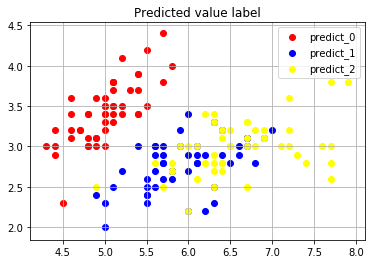

In [23]:
# x = np.random.rand(100)
# y = np.random.rand(100)
# x = df["sepal length (cm)"]
# y = df["sepal width (cm)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Predicted value label')
# ax.scatter(x,y, c='red', label='group1')
ax.scatter(df_prediction_0["sepal length (cm)"], df_prediction_0["sepal width (cm)"], c='red', label='predict_0')
ax.scatter(df_prediction_1["sepal length (cm)"], df_prediction_1["sepal width (cm)"], c='blue', label='predict_1')
ax.scatter(df_prediction_2["sepal length (cm)"], df_prediction_2["sepal width (cm)"], c='yellow', label='predict_2')

ax.grid(True)
ax.legend(loc='upper right')

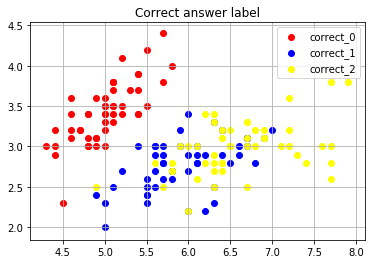

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Correct answer label')
# ax.scatter(x,y, c='red', label='group1')
ax.scatter(df_correct_answer_0["sepal length (cm)"], df_correct_answer_0["sepal width (cm)"], c='red', label='correct_0')
ax.scatter(df_correct_answer_1["sepal length (cm)"], df_correct_answer_1["sepal width (cm)"], c='blue', label='correct_1')
ax.scatter(df_correct_answer_2["sepal length (cm)"], df_correct_answer_2["sepal width (cm)"], c='yellow', label='correct_2')

ax.grid(True)
ax.legend(loc='upper right')